In [1]:
DATA_DIR = '../../data/' # for local
# DATA_DIR = 'drive/My Drive/colab/' # for colab

In [75]:
from nilearn.input_data import NiftiMasker
from nilearn.datasets import load_mni152_brain_mask
import os
import glob
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import classification_common
import joblib

#To ensure reproducibility
np.random.seed(39)

In [5]:
# Create/store/load binary image data
if not os.path.isfile(DATA_DIR + 'binary_imgs.npy'):

    dataset_path = "../../sample-dataset/HallymBundang_lesionmaps_Bzdok_n1401/"
    img_filenames = glob.glob(os.path.join(dataset_path, '*.nii.gz'))
    img_filenames.sort()
    print('Number of subjects: %d' % len(img_filenames))

    img_shape = load_img(img_filenames[0]).shape

    mask_img = load_mni152_brain_mask()
    masker = NiftiMasker(mask_img=mask_img, memory='nilearn_cache', verbose=5)
    masker = masker.fit()

    imgs = masker.transform(img_filenames) # break down into slices if necessary
    imgs = imgs.astype(bool)
    np.save(DATA_DIR + 'binary_imgs', imgs)

else:
    imgs = np.load(DATA_DIR + 'binary_imgs.npy')

print(imgs.shape)

(1401, 228453)


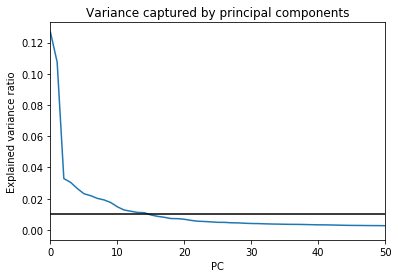

In [9]:
# plot variance explained by components
if not os.path.isfile(DATA_DIR + 'pca_all.joblib'): 
    pca_all = PCA(copy=False)
    X_pc_all = pca_all.fit_transform(imgs)
    joblib.dump(pca_all, DATA_DIR + 'pca_all.joblib') 

else:
    pca_all = joblib.load(DATA_DIR + 'pca_all.joblib') 
    
plt.plot(pca_all.explained_variance_ratio_)
plt.title("Variance captured by principal components")
plt.xlabel("PC")
plt.xlim(0, 50)
plt.axhline(0.01, color="black")
plt.ylabel("Explained variance ratio")
plt.show()

In [3]:
# Calculate 100 PC components
N_PCA = 100
if not os.path.isfile(DATA_DIR + 'binary_imgs_pc_100.npy'):    
    pca = PCA(n_components=N_PCA, copy=False)
    X_pc = pca.fit_transform(imgs)
    np.save(DATA_DIR + 'binary_imgs_pc_100.npy', X_pc)
    
else:
    X_pc = np.load(DATA_DIR + 'binary_imgs_pc_100.npy')
    
X_pc.shape

(1401, 100)

In [4]:
patient_df = pd.read_hdf(DATA_DIR + 'patients.h5', 'p')
scaler_Y = StandardScaler()
Y = scaler_Y.fit_transform(np.array(patient_df[patient_df.columns[5:11]]))
print(Y.shape)

(1401, 6)


In [5]:
# sort the outcomes
if not os.path.isfile(DATA_DIR + 'Y_sort_idx.npy'):    
    Y_sort_idx = np.empty(Y.shape, dtype=int)
    for i in range(Y.shape[1]):
        Y_sort_idx[:, i] = np.argsort(Y[:, i])

    # save for consistency in future analysis
    np.save(DATA_DIR + 'Y_sort_idx', Y_sort_idx)
    
else:
    Y_sort_idx = np.load(DATA_DIR + 'Y_sort_idx.npy')
    
print(Y_sort_idx.shape)

(1401, 6)


### Classification

In [ ]:
def run_logistic_regression_clf(X, Y, Y_sort_idx):
    
    estimator = LogisticRegression(random_state = 39, max_iter=20000)
    C = [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
    grid = {'C': C}
    
    return run_classification(X, Y, Y_sort_idx,estimator, grid, "Logistic Regression")


In [43]:
scores_df_lr, best_params_df_lr = classification_common.run_random_forest_clf(X_pc, Y, Y_sort_idx)


Global Cognition

Model: Logistic Regression, Data % used: 100.0%
Fold-1: Best params: {'C': 100}
Fold-2: Best params: {'C': 100}
Fold-3: Best params: {'C': 10}
Fold-4: Best params: {'C': 100}
Fold-5: Best params: {'C': 10}
Model: Logistic Regression, Data % used: 60.0%
Fold-1: Best params: {'C': 10}
Fold-2: Best params: {'C': 10}
Fold-3: Best params: {'C': 1}
Fold-4: Best params: {'C': 100}
Fold-5: Best params: {'C': 1000}
Model: Logistic Regression, Data % used: 40.0%
Fold-1: Best params: {'C': 100}
Fold-2: Best params: {'C': 100}
Fold-3: Best params: {'C': 1000}
Fold-4: Best params: {'C': 100}
Fold-5: Best params: {'C': 100}
Model: Logistic Regression, Data % used: 20.0%
Fold-1: Best params: {'C': 100}
Fold-2: Best params: {'C': 10}
Fold-3: Best params: {'C': 100}
Fold-4: Best params: {'C': 1}
Fold-5: Best params: {'C': 1}

Language

Model: Logistic Regression, Data % used: 100.0%
Fold-1: Best params: {'C': 1}
Fold-2: Best params: {'C': 10}
Fold-3: Best params: {'C': 10}
Fold-4: Be

/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold-4: Best params: {'C': 1000000}
Fold-5: Best params: {'C': 100}

Visuospatial Functioning

Model: Logistic Regression, Data % used: 100.0%
Fold-1: Best params: {'C': 10}
Fold-2: Best params: {'C': 10000}
Fold-3: Best params: {'C': 1000}
Fold-4: Best params: {'C': 100}
Fold-5: Best params: {'C': 100}
Model: Logistic Regression, Data % used: 60.0%
Fold-1: Best params: {'C': 100}
Fold-2: Best params: {'C': 100}
Fold-3: Best params: {'C': 100}
Fold-4: Best params: {'C': 100}
Fold-5: Best params: {'C': 100}
Model: Logistic Regression, Data % used: 40.0%
Fold-1: Best params: {'C': 1000}
Fold-2: Best params: {'C': 100}
Fold-3: Best params: {'C': 1000000}
Fold-4: Best params: {'C': 10000}
Fold-5: Best params: {'C': 1000}
Model: Logistic Regression, Data % used: 20.0%
Fold-1: Best params: {'C': 10000000}
Fold-2: Best params: {'C': 100000}
Fold-3: Best params: {'C': 1000000}
Fold-4: Best params: {'C': 10000}
Fold-5: Best params: {'C': 1000}

Memory

Model: Logistic Regression, Data % used: 1

/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold-1: Best params: {'C': 10000000}


/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold-2: Best params: {'C': 10000000}
Fold-3: Best params: {'C': 10000000}
Fold-4: Best params: {'C': 10000000}
Fold-5: Best params: {'C': 1000000}


/Users/hasnainmamdani/Academics/McGill/thesis/scikit-learn/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [85]:
def run_random_forest_clf(X, Y, Y_sort_idx):
    
    estimator = RandomForestClassifier(random_state = 39)
    
    n_estimators = [100, 500, 1000, 1500]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [2, 5, 10, 30, 50, None]
    min_samples_split = [2, 5, 10, 15]
    min_samples_leaf = [1, 2, 4, 8, 12]
    max_samples = [0.5, 0.7, 0.8, 0.9, None]
    
    grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_samples': max_samples}

    
    return run_classification(X, Y, Y_sort_idx, estimator, grid, "Random Forest", random_search_cv=True)
    

In [86]:
scores_df_rf, best_params_df_rf = classification_common.run_random_forest_clf(X_pc, Y, Y_sort_idx)


Global Cognition

Data % used: 100.0%
Fold-1: Best params: {'n_estimators': 1000, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_samples': 0.5, 'max_features': 'sqrt', 'max_depth': 10}
Fold-2: Best params: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'auto', 'max_depth': 30}
Fold-3: Best params: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': None}
Fold-4: Best params: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': None}
Fold-5: Best params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.9, 'max_features': 'log2', 'max_depth': None}
Data % used: 60.0%
Fold-1: Best params: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': None}
Fold-2: Best param

In [ ]:
scores_df_all = pd.concat([scores_df_lr, scores_df_rf], ignore_index=True)

# persist results
scores_df_all.to_hdf('results/results_pca_100_single_output.h5', key='p', mode='w')
# scores_df_all = pd.read_hdf('results/results_pca_100_single_output.h5', key='p', mode='r')

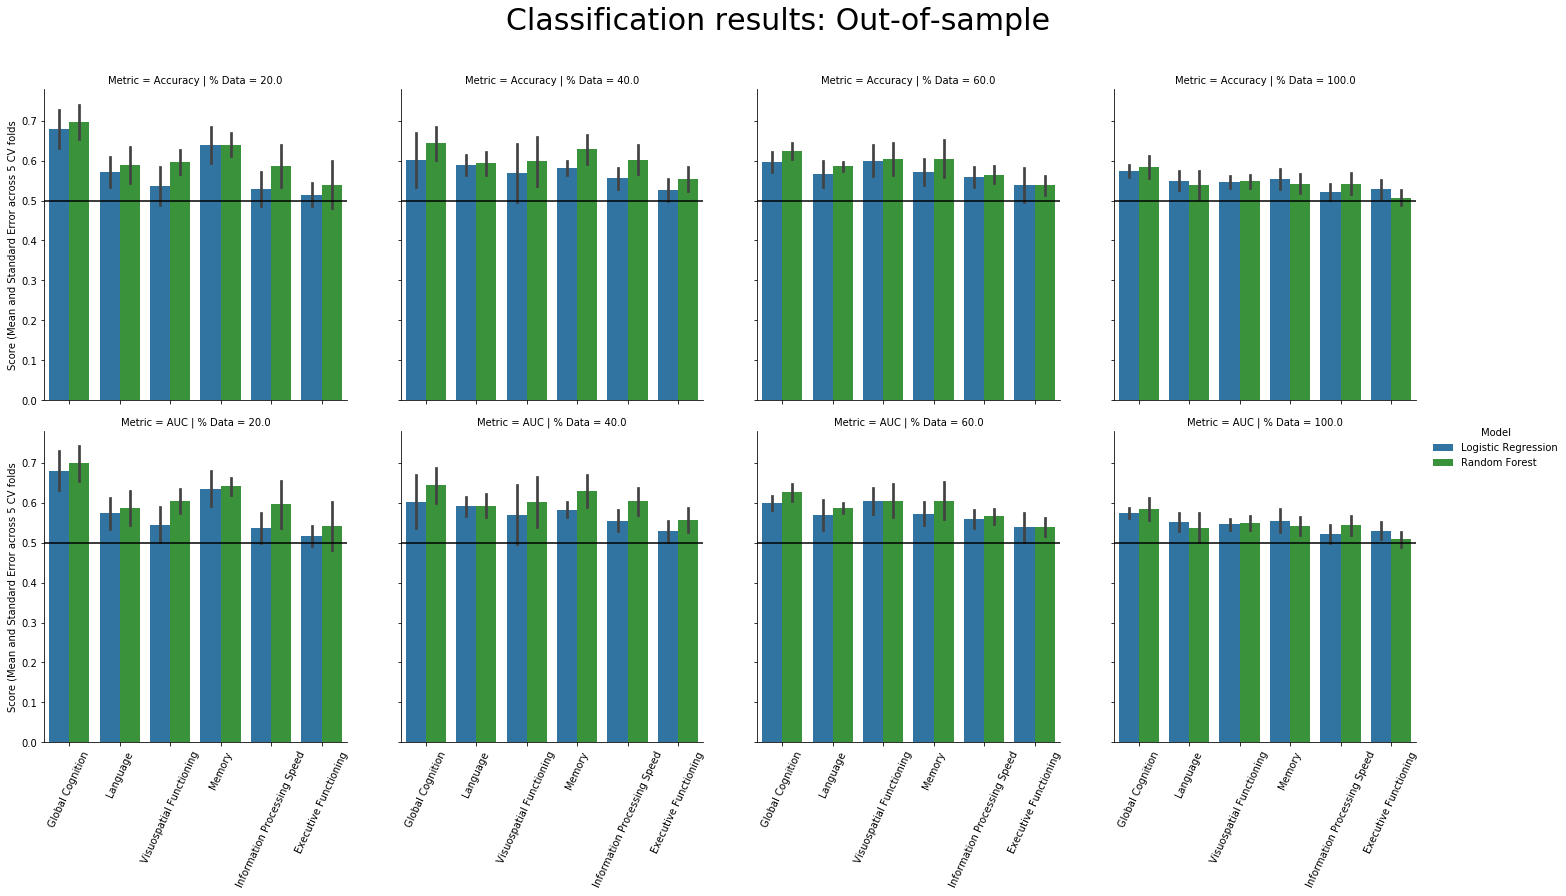

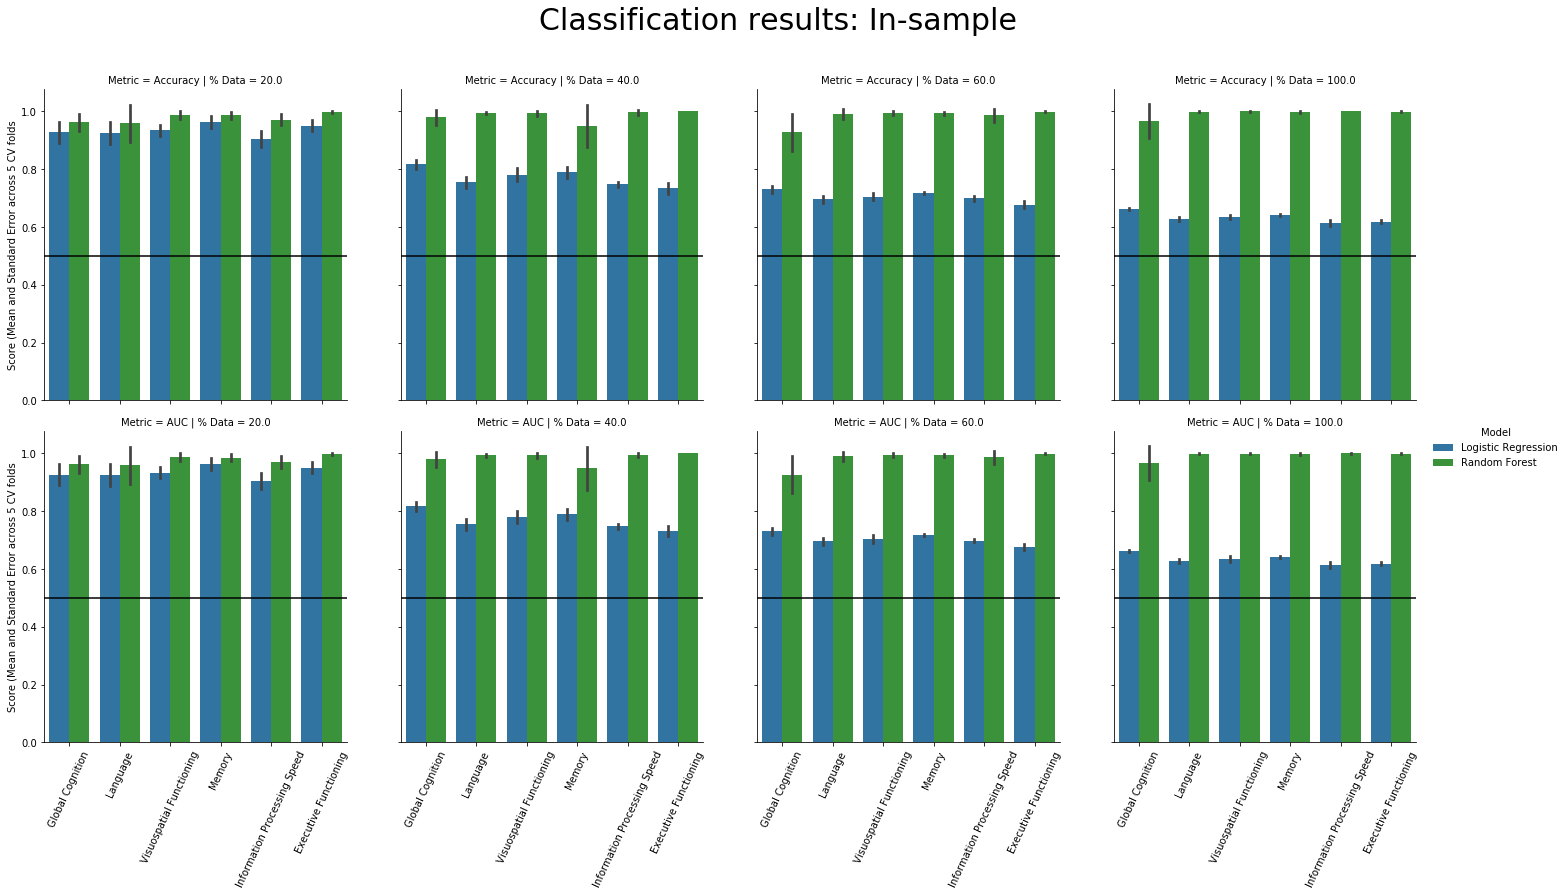

In [155]:
# plot results
classification_common.plot_all_scores(scores_df_all)